In [53]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import binom
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

# Libraries for ML
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.simplefilter('ignore')

In [54]:
# Reading the Dataset
data = pd.read_csv('Data/Estimated Population (Persons in April).csv')
data.head(4)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,C02196V04140,Region,UNIT,VALUE
0,PEA04,Estimated Population (Persons in April),2011,2011,205,0 - 4 years,-,Both sexes,-,State,Thousand,356.0
1,PEA04,Estimated Population (Persons in April),2011,2011,205,0 - 4 years,-,Both sexes,B1A65D7C-1984-4A87-AD58-0E846812C992,Border,Thousand,30.7
2,PEA04,Estimated Population (Persons in April),2011,2011,205,0 - 4 years,-,Both sexes,A69CA800-8D87-4920-A7C1-50426A1D39B4,West,Thousand,32.6
3,PEA04,Estimated Population (Persons in April),2011,2011,205,0 - 4 years,-,Both sexes,42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78,Mid-West,Thousand,35.0


In [55]:
# Removing unnecessary column showing no information
columns = ['STATISTIC', 'STATISTIC Label', 'TLIST(A1)', 'C02076V02508', 'C02199V02655', 'C02196V04140', "UNIT"]
data.drop(columns=columns, inplace=True)
data.head(5)

,Year,Age Group,Sex,Region,VALUE
0,2011,0 - 4 years,Both sexes,State,356.0
1,2011,0 - 4 years,Both sexes,Border,30.7
2,2011,0 - 4 years,Both sexes,West,32.6
3,2011,0 - 4 years,Both sexes,Mid-West,35.0
4,2011,0 - 4 years,Both sexes,South-East,32.0


# 1- Statistics

## a- Descriptive Statistics

In [56]:
# Excuding the Aggregated Data
# 1- 'All ages' from 'Age Group' column
# 2- "State" from "Region" Column
data = data[data['Age Group'] != "All ages"]
data = data[data['Region'] != 'State']
data = data[data['Sex'] != "Both sexes"]

In [57]:
# Function to perform all EDA
def perform_eda(df, name=""):
    # Printing basic detail of data like name, size, shape
    print(f"EDA of {str(name)} Data....")
    print(f"Size {df.size}")
    print(f"Columns {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*50)
    
    # Printing top 5 records of data
    print("First Look of Data....")
    display(df.head())
    print("="*50)
    
    # Getting Numerical and Categorical columns Separately
    cat_cols = df.select_dtypes(object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Printing the Numerical columns
    print("Dataset has following Numerical columns...")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")

    # Printing the Categorical columns
    print("\n\nDataset has following Categorical columns...")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")
    
    # Printing info of data like data type, non null values
    print("="*50)
    print("Information of Data....")
    print(df.info())
    print("="*50)
    
    # Printing info of data like data type, non null values
    print("="*50)
    print("Check for Null Values....")
    print(df.isnull().sum())
    print("="*50)
    
    # Displaying statistical properties of data like mean, median, max, min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)

In [58]:
perform_eda(data, "Estimated Population")

EDA of Estimated Population Data....
Size 18720
Columns 5
Records 3744
First Look of Data....


,Year,Age Group,Sex,Region,VALUE
10,2011,0 - 4 years,Male,Border,15.8
11,2011,0 - 4 years,Male,West,16.6
12,2011,0 - 4 years,Male,Mid-West,18.0
13,2011,0 - 4 years,Male,South-East,16.4
14,2011,0 - 4 years,Male,South-West,25.5


Dataset has following Numerical columns...
 1) Year
 2) VALUE


Dataset has following Categorical columns...
 1) Age Group
 2) Sex
 3) Region
Information of Data....
<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 10 to 6641
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       3744 non-null   int64  
 1   Age Group  3744 non-null   object 
 2   Sex        3744 non-null   object 
 3   Region     3744 non-null   object 
 4   VALUE      3744 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 175.5+ KB
None
Check for Null Values....
Year         0
Age Group    0
Sex          0
Region       0
VALUE        0
dtype: int64
Statistical Properties of Data....


,Year,Age Group,Sex,Region,VALUE
count,3744.000000,3744,3744,3744,3744.000000
unique,NaN,18,2,8,NaN
top,NaN,0 - 4 years,Male,Border,NaN
freq,NaN,208,1872,468,NaN
mean,2017.000000,NaN,NaN,NaN,16.848691
std,3.742157,NaN,NaN,NaN,11.431460
min,2011.000000,NaN,NaN,NaN,1.200000
25%,2014.000000,NaN,NaN,NaN,10.200000
50%,2017.000000,NaN,NaN,NaN,14.300000
75%,2020.000000,NaN,NaN,NaN,20.000000


## b- Visualizations

- **Population over the years**

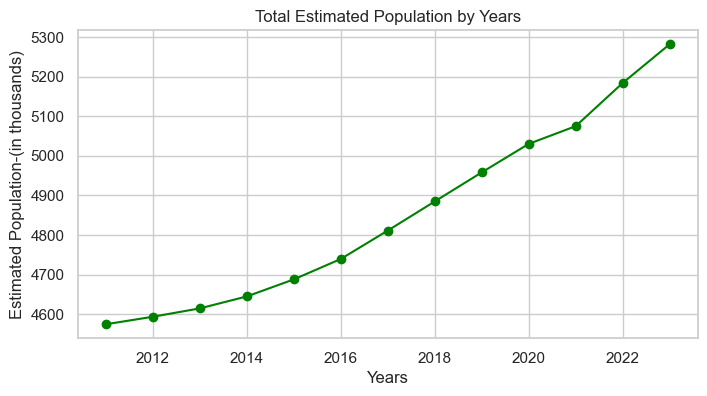

In [59]:
yearly_population = data.groupby('Year')['VALUE'].sum()

plt.figure(figsize=(8, 4))
yearly_population.plot(kind='line', marker='o', color="green")
plt.title('Total Estimated Population by Years')
plt.xlabel('Years')
plt.ylabel('Estimated Population-(in thousands)')
plt.grid(True)
plt.show()

- **Plotting Histogram of population values**

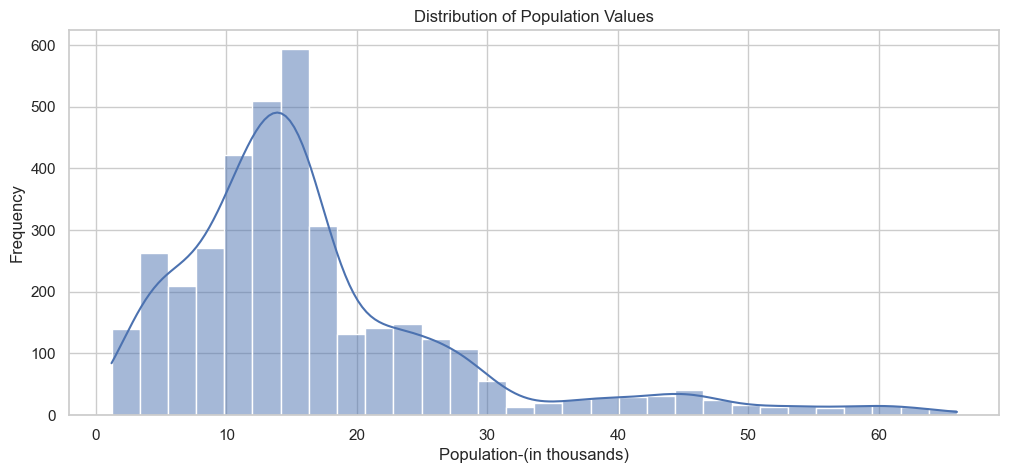

In [60]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))
sns.histplot(data['VALUE'], bins=30, kde=True)
plt.title('Distribution of Population Values')
plt.xlabel('Population-(in thousands)')
plt.ylabel('Frequency')
plt.show()

- **A bar plot to compare the population sizes across different age groups**

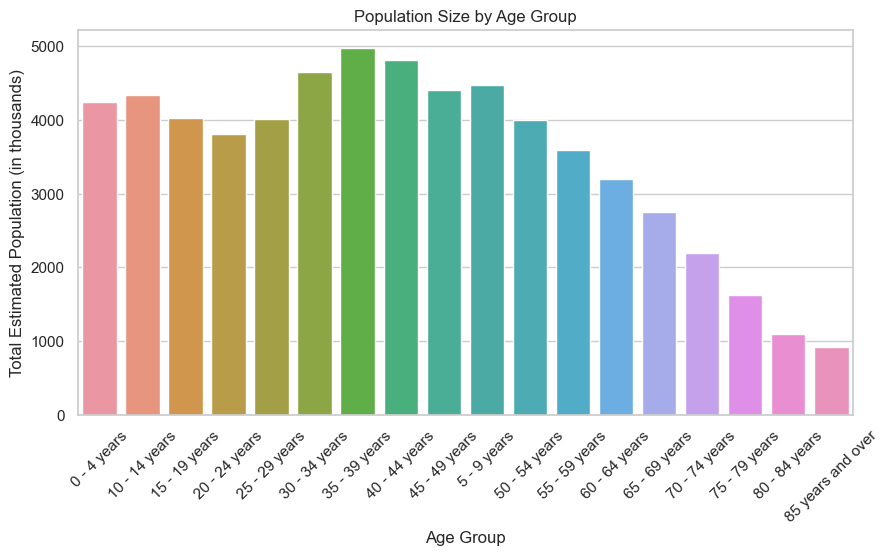

In [66]:
age = data.groupby('Age Group')['VALUE'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=age.index, y=age.values)
plt.title('Population Size by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Estimated Population (in thousands)')
plt.xticks(rotation=45)
plt.show()

- **A bar plot to compare the population sizes across different regions**

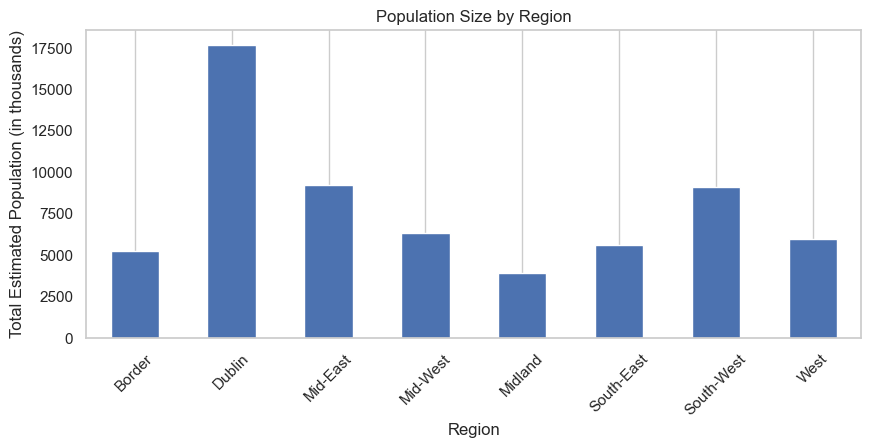

In [67]:
region = data.groupby('Region')['VALUE'].sum()

plt.figure(figsize=(10, 4))
region.plot(kind='bar')
plt.title('Population Size by Region')
plt.xlabel('Region')
plt.ylabel('Total Estimated Population (in thousands)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


- **Boxplot among ages**

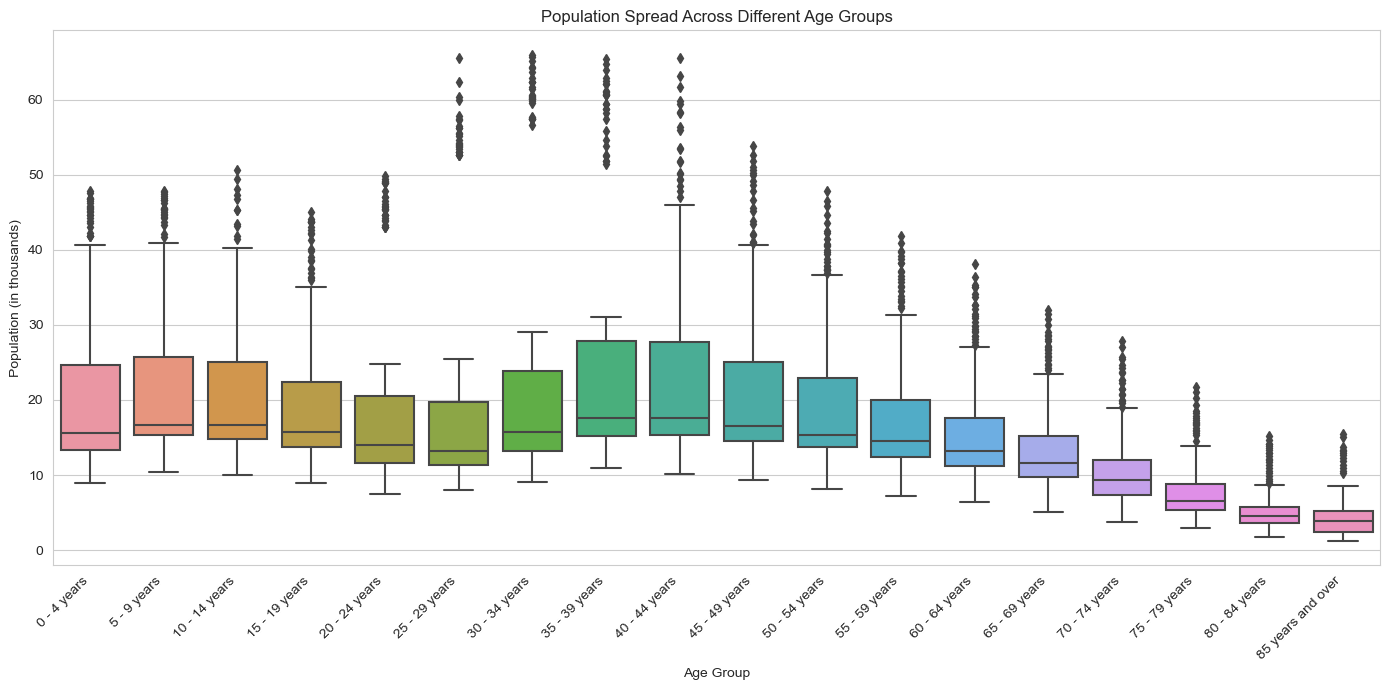

In [11]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Age Group', y='VALUE', data=data)
plt.title('Population Spread Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Population (in thousands)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## c- Bionomial & Piosson Distribution

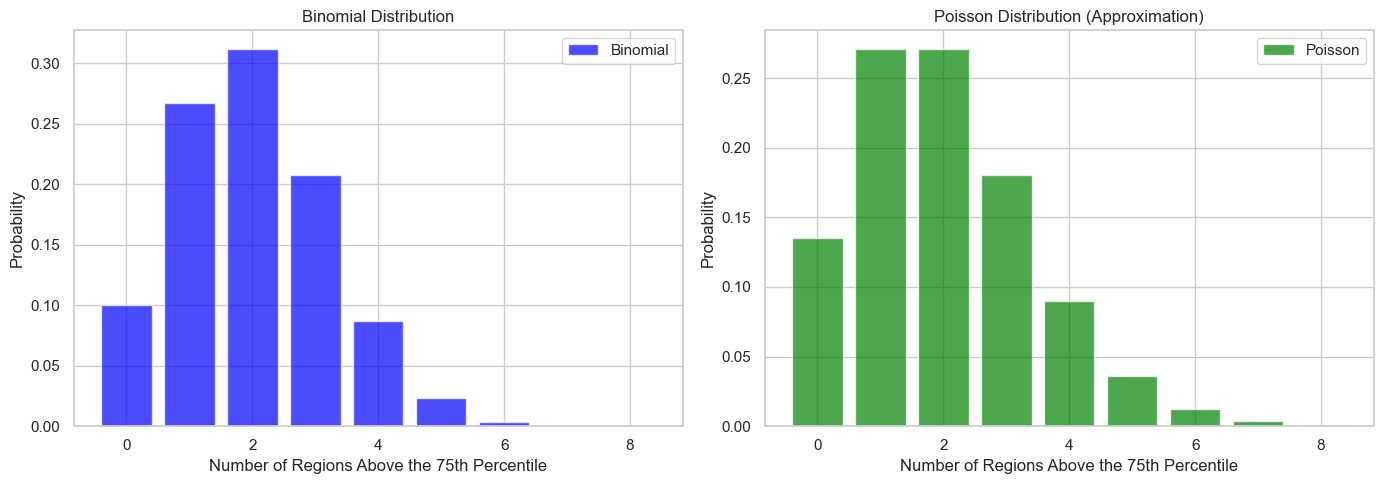

20.525 0.25 8 2.0


In [69]:
# Filter the dataset
age_group_20_24 = data[data['Age Group'] == '20 - 24 years']

# 75th percentile for the age group 20-24
percentile_75th = age_group_20_24['VALUE'].quantile(0.75)

# Calculate the probability of success for the binomial distribution (p)
success_probability = (age_group_20_24['VALUE'] > percentile_75th).mean()

n_trials = age_group_20_24['Region'].nunique()

# For the Poisson distribution, λ (lambda) is the rate of success
lambda_poisson = success_probability * n_trials

k_values = np.arange(0, n_trials+1)

# Binomial distribution probabilities
binomial_probs = [binom.pmf(k, n_trials, success_probability) for k in k_values]

# Poisson distribution probabilities for the same range of k
poisson_probs = [poisson.pmf(k, lambda_poisson) for k in k_values]

# Visualize the distributions
plt.figure(figsize=(14, 5))

# Binomial distribution plot
plt.subplot(1, 2, 1)
plt.bar(k_values, binomial_probs, color='blue', alpha=0.7, label='Binomial')
plt.title('Binomial Distribution')
plt.xlabel('Number of Regions Above the 75th Percentile')
plt.ylabel('Probability')
plt.legend()

# Poisson distribution plot
plt.subplot(1, 2, 2)
plt.bar(k_values, poisson_probs, color='green', alpha=0.7, label='Poisson')
plt.title('Poisson Distribution (Approximation)')
plt.xlabel('Number of Regions Above the 75th Percentile')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

print(percentile_75th, success_probability, n_trials, lambda_poisson)


## d- Normal Distribution

- Calculate the mean and standard deviation of the population (VALUE) across the dataset.
- Plot the distribution of the population values to see if it approximates a normal distribution.
- Overlay the theoretical normal distribution curve based on the calculated mean and standard deviation to see how well it fits the actual data distribution.

In [70]:
# Calculate the mean (mu) and standard deviation (sigma) of the population data
mu = data['VALUE'].mean()
sigma = data['VALUE'].std()

print("Mean for population is: ", mu)
print('Standard Deviation for population is: ', sigma)

Mean for population is:  16.84869123931624
Standard Deviation for population is:  11.431460000440474


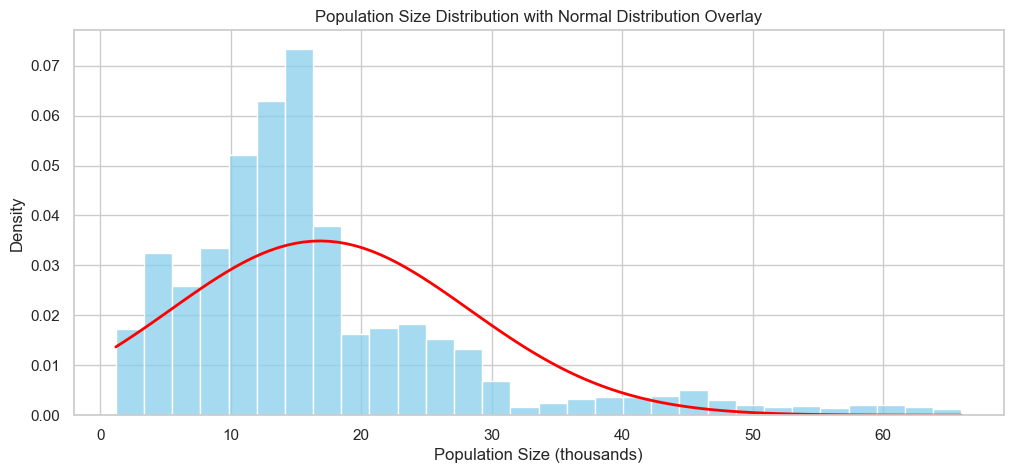

In [71]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))
sns.histplot(data['VALUE'], kde=False, bins=30, color='skyblue', stat='density')

x = np.linspace(data['VALUE'].min(), data['VALUE'].max(), 100)

pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, color='red', linewidth=2)

plt.title('Population Size Distribution with Normal Distribution Overlay')
plt.xlabel('Population Size (thousands)')
plt.ylabel('Density')
plt.show()

# 2- Data preparation and Visualization 

## a- Data Inspection

In [72]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Check the data types of each column
data_types = data.dtypes

print('*'*50)
print(missing_values)
print('*'*50)
print(data_types)

**************************************************
Year         0
Age Group    0
Sex          0
Region       0
VALUE        0
dtype: int64
**************************************************
Year           int64
Age Group     object
Sex           object
Region        object
VALUE        float64
dtype: object
